<a href="https://colab.research.google.com/github/kozen88/Diabetes_Onward_Monitor/blob/main/diabetes_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Predicting Diabetes Progression in High-Risk Patients
The scikit-learn diabetes dataset contains clinical examples of patients with diabetes. It is a regression dataset whose target is a quantitative measure representing the progression of the disease.<br>
<br>

It can be loaded using the following import: from sklearn.datasets import load_diabetes and then using the load_diabetes function to obtain the various data (more details in the official documentation: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html).<br>
<br>


The columns of the dataset are as follows:
1. age: age
2. sex: gender
3. bmi: body mass index
4. bp: average blood pressure
5. s1: total serum cholesterol
6. s2: low-density lipoproteins
7. s3: high-density lipoproteins
8. s4: total cholesterol/HDL
9. s5: triglycerides
10. s6: blood sugar level<br>

<br>

-----

<br>**You need to create a regression model that, starting from this dataset, tries to predict the target.**<br>
<br>
**Explain the various steps of creating the model and selecting the variables, and comment on the results obtained.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold, learning_curve
from sklearn.feature_selection import SelectKBest, f_regression, r_regression, mutual_info_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# this raw of code allow to get the dataset divided into feature input and target as X and y
# and the last line get a descriction of the dataset and what the feature represent
# uncomment if you want to proced this way but remeber to skip the following raw of code
# and make the rename of the columns before training the model

# X, y = load_diabetes(return_X_y=True, as_frame=True)
# print(load_diabetes()['DESCR'])

Lets start with importing the date and exctract a dataframe pandas which contain the dataset with the feauters and target.

In [2]:
# getting a bunch object similar to a dictonary in python
diabetes_bunch = load_diabetes(as_frame=True, scaled=True)

In [3]:
# take a look at the type
print(type(diabetes_bunch))

<class 'sklearn.utils._bunch.Bunch'>


In [4]:
help('sklearn.utils._bunch.Bunch')

Help on class Bunch in sklearn.utils._bunch:

sklearn.utils._bunch.Bunch = class Bunch(builtins.dict)
 |  sklearn.utils._bunch.Bunch(**kwargs)
 |  
 |  Container object exposing keys as attributes.
 |  
 |  Bunch objects are sometimes used as an output for functions and methods.
 |  They extend dictionaries by enabling values to be accessed by key,
 |  `bunch["value_key"]`, or by an attribute, `bunch.value_key`.
 |  
 |  Examples
 |  --------
 |  >>> from sklearn.utils import Bunch
 |  >>> b = Bunch(a=1, b=2)
 |  >>> b['b']
 |  2
 |  >>> b.b
 |  2
 |  >>> b.a = 3
 |  >>> b['a']
 |  3
 |  >>> b.c = 6
 |  >>> b['c']
 |  6
 |  
 |  Method resolution order:
 |      Bunch
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __dir__(self)
 |      Default dir() implementation.
 |  
 |  __getattr__(self, key)
 |  
 |  __init__(self, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __setattr__(self, key, value)
 |      Im

In [5]:
# extracction of the dataframe wanted
df = diabetes_bunch.data

In [6]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [7]:
print(f"The dataset is composed of {df.shape[0]} raws and {df.shape[1]} columns.")

The dataset is composed of 442 raws and 10 columns.


In [8]:
# lets save the dataset we have extract into a file for future use
df.to_csv("diabetes.csv", index=False)

df.to_excel("diabetes.xlsx", index=False)

In [9]:
# Lets change the name of same columns to be more significant
new_name = ['cholesterol', 'LDL', 'HDL', 'Trig', 'CF-HDL', 'glucose']
df = df.rename(columns={'s1': new_name[0], 's2': new_name[1], 's3': new_name[2], 's4': new_name[3], 's5': new_name[4], 's6': new_name[5]})

In [10]:
df

,age,sex,bmi,bp,cholesterol,LDL,HDL,Trig,CF-HDL,glucose
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


The new name for the features have been chosen from the following website:<br>
[blood text abbreviation](https://www.yourdictionary.com/articles/blood-tests-abbreviations)

## Basic Data exploration
We are going to perform a bunch of operation which allow us tto take a look at the data types and also to consider how the data are distributed and how much ours features are correlated to each other.

In [11]:
# statistics summarization
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
cholesterol,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
LDL,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
HDL,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
Trig,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
CF-HDL,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
glucose,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [12]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   cholesterol  442 non-null    float64
 5   LDL          442 non-null    float64
 6   HDL          442 non-null    float64
 7   Trig         442 non-null    float64
 8   CF-HDL       442 non-null    float64
 9   glucose      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [13]:
# double check on the Nan values
df.isna().sum()

age            0
sex            0
bmi            0
bp             0
cholesterol    0
LDL            0
HDL            0
Trig           0
CF-HDL         0
glucose        0
dtype: int64

**NOTE**:<br>
From the first retrivial of the information about our dataset we can conclude that all variable are numeric in particular float64 but we have to remember that the daataset we have loaded is already scaled and ready to be used for training a model. There are no missing values.


the variables sex is a categorical one from the description opf the daset we can check this and see it is rapresented with two values 2.0 and 1.0 which scaled turned into the following values that wwe can see with the following two raw of code.

In [16]:
df['sex'][0]

0.05068011873981862

In [17]:
df['sex'][1]

-0.044641636506989144

In [18]:
# we will changenge the value on sex column in order to be able to plot different color base on sex in a scatter plot
sex_dict = {0.05068011873981862:1, -0.044641636506989144:0}
df["sex"] = df["sex"].map(sex_dict)

The next step will be to visualize the distribution on the features taken pair by pair and check if there are significant correlation, after this step we will calculate the correlation  matrix to quantify all possible correlations.

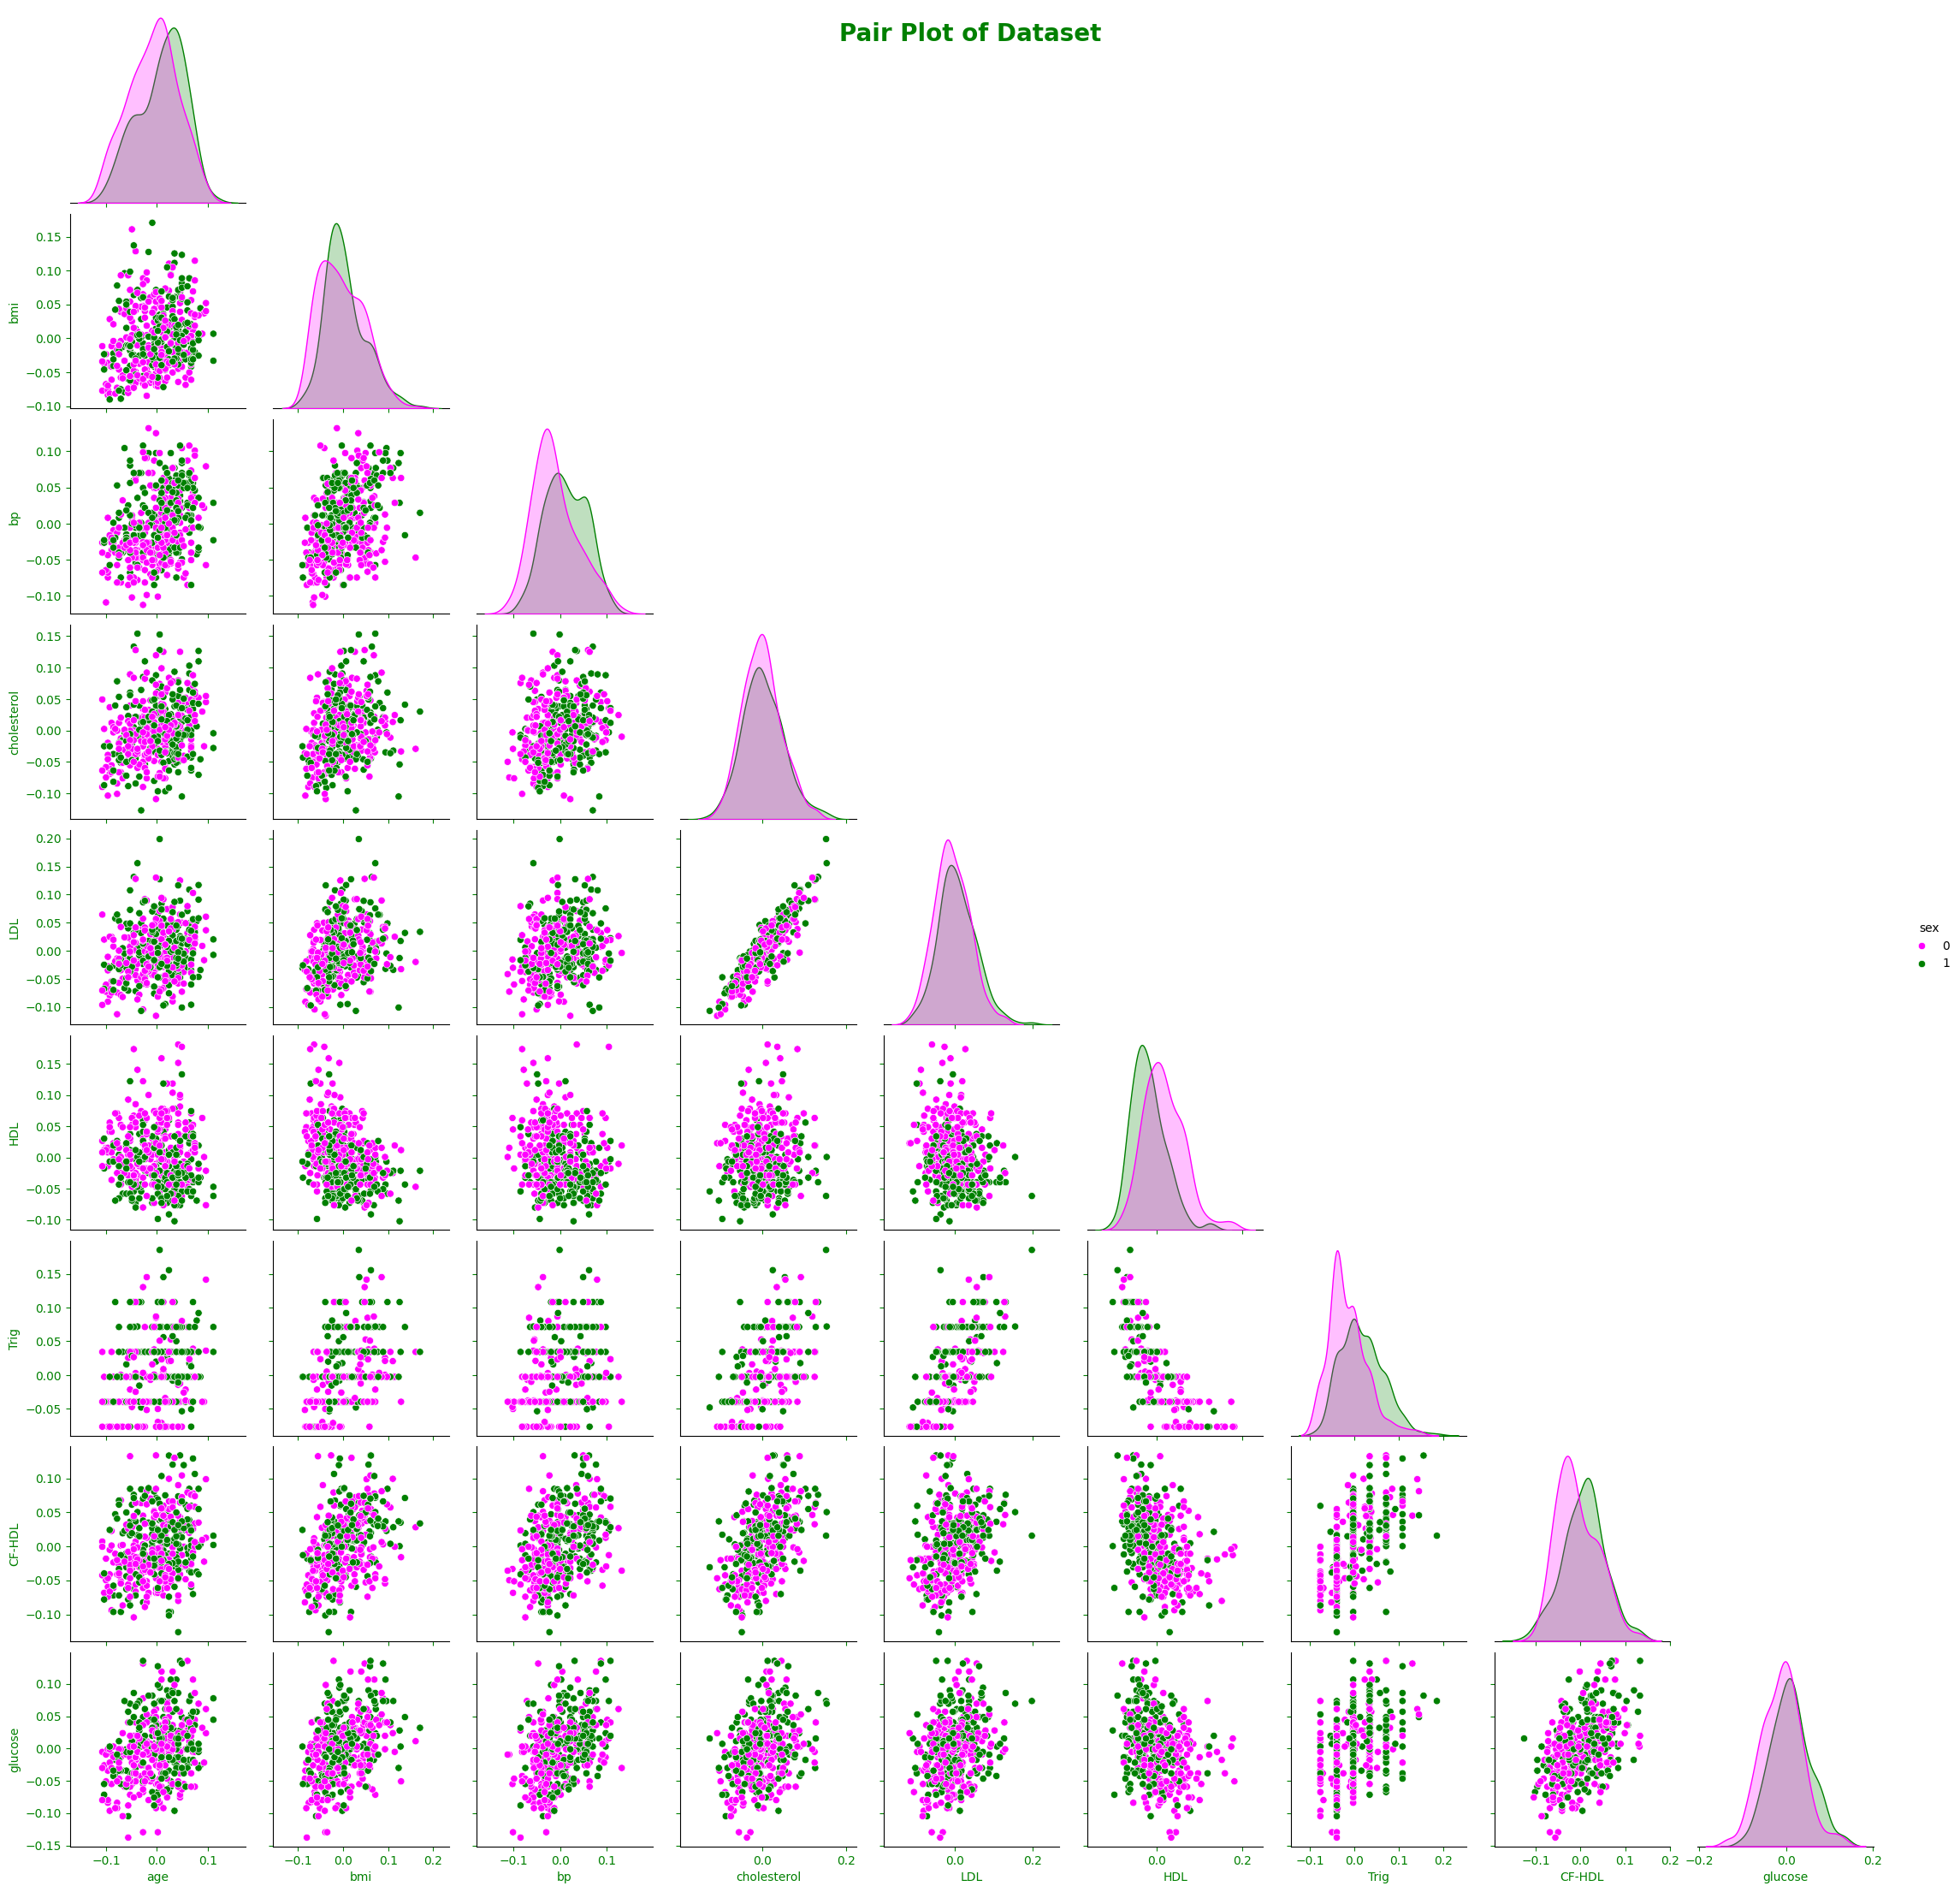

In [19]:
# Lets generate the pair plot which is a scatter plot for each pair of feature present in the dataset
# we are setting a different color for male and female obseravation
sns.pairplot(df, corner=True, hue='sex', palette={1: 'green', 0: 'fuchsia'})
plt.suptitle('Pair Plot of Dataset', fontsize=20, color="green", fontweight='bold')

for ax in plt.gcf().get_axes():
    ax.tick_params(axis='both', colors='green')
    ax.set_xlabel(ax.get_xlabel(), color='green')
    ax.set_ylabel(ax.get_ylabel(), color='green')

plt.show()

**NOTE**<br>
From the pair plot generated we can see there is a strong linear correlation between LDL and cholesterol, while other linear influence can be detected between glucose and CF-HDL, glucose and LDL, glucose and bmi.

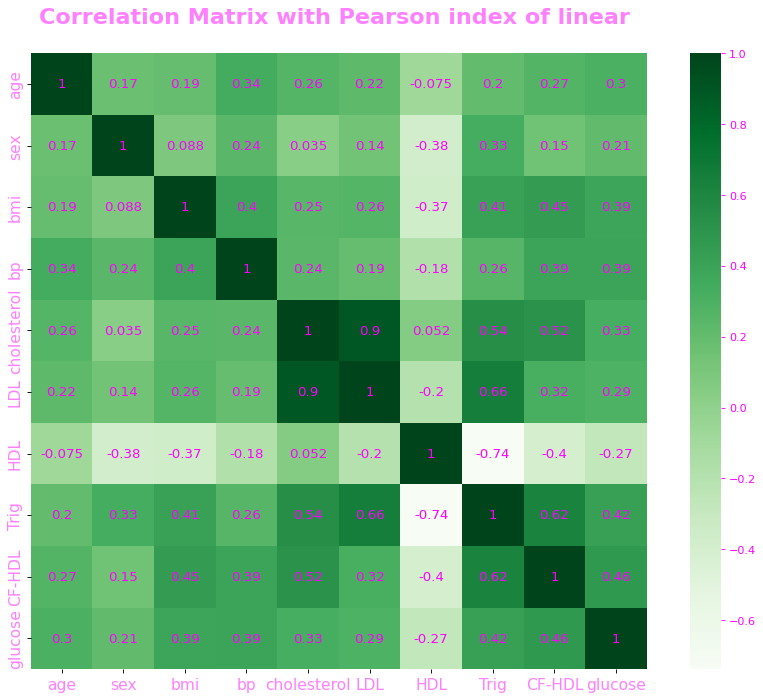

In [21]:
plt.figure(figsize=(14, 10), dpi=80)

# define a particular color
light_fuchsia = '#FF80FF'

correlation_matrix = df.corr()

# Lets define how the correlatrion matrix will be showed by seaborn
hm = sns.heatmap(correlation_matrix,
                 cmap='Greens',
                 cbar=True,
                 square=True,
                 yticklabels=df.columns,
                 xticklabels=df.columns,
                 annot=True,
                 annot_kws={'size':12, 'color':'fuchsia'})

# Set the colobar
cbar = hm.collections[0].colorbar
cbar.ax.yaxis.set_tick_params(color='fuchsia', labelcolor='fuchsia')

# Set the labels
hm.set_xticklabels(hm.get_xticklabels(), color=light_fuchsia, fontsize=14)
hm.set_yticklabels(hm.get_yticklabels(), color=light_fuchsia, fontsize=14)

plt.title('Correlation Matrix with Pearson index of linear \n', fontsize=20, color=light_fuchsia, fontweight='bold')
plt.show()

In [22]:
treshold = 0.6

# Lets print the variable that have a correlation above 0.6 in absolute value
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if i != j:
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) >= treshold:
                var1 = correlation_matrix.columns[i]
                var2 = correlation_matrix.columns[j]
                print(f"Correlated variables: {var1} e {var2}")
                print(f"Correlation value: {corr_value:.2f}")
                print()

Correlated variables: LDL e cholesterol
Correlation value: 0.90

Correlated variables: Trig e LDL
Correlation value: 0.66

Correlated variables: Trig e HDL
Correlation value: -0.74

Correlated variables: CF-HDL e Trig
Correlation value: 0.62



**NOTE**:<br>
With the treshold we have set a limit for those variables that are strong correlated, this because we don't want to give useless features to our model during the traing. Now we the correlation matrix we know which variables to eliminate to facilitate the learning of the regression model.

### BASELINE FOR LINEAR REGRESSION

In [23]:
# lets slipt dataset in features and target
X = df.drop('glucose', axis=1)
y = df['glucose']

# defining a seed
RANDOM_SEED = 301

In [24]:
# Lets standardize our data althogh regression do not suffer from scaling of data
# is a good operation to perform before training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=RANDOM_SEED)

# to proced with Standardization uncomment the following code raw, in case the dataset loaded is not with parameter scaled=True
# and run again the following cell
# ss = StandardScaler()
# X_train = ss.fit_transform(X_train)
# X_test = ss.transform(X_test)

In [25]:
# check on the partitioning of dataset in train and test
print(f"The dimension of the train for input and output are: {X_train.shape} and {y_train.shape}.")
print(f"The dimension of the test for input and output are:{X_test.shape} and {y_test.shape}")

The dimension of the train for input and output are: (375, 9) and (375,).
The dimension of the test for input and output are:(67, 9) and (67,)


In [26]:
# global variable to use with the function show_performance()
ON_TRAIN_SET = "TRAINING SET"
ON_TEST_SET = "TEST SET"

In [27]:
def show_performance(ground_truth, prediction, where):
  """
  This function shows a bunch of metrics used to evaluate models on regression tasks.

  Parameter:
  - prediction(np.array): what the model has predicted
  - ground_trouth(np.array): what are the real target
  - where(str): use to specify if the evaluation is on training or on testing set
  """

  print(f"MODEL EVALUATION RESULTS ON {where}:")
  print(f"MAE = {mean_absolute_error(ground_truth, prediction)}")
  print(f"MSE = {mean_squared_error(ground_truth, prediction)}")
  print(f"RMSE = {np.sqrt(mean_squared_error(ground_truth, prediction))}")
  print(f"R2 = {r2_score(ground_truth, prediction)}")


In [28]:
# Now the we have the partion of the training we procced to train the model
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred_on_train = lr.predict(X_train)

show_performance(y_train, y_pred_on_train, ON_TRAIN_SET)

MODEL EVALUATION RESULTS ON TRAINING SET:
MAE = 0.03093207173165152
MSE = 0.0015019877178152387
RMSE = 0.03875548629310744
R2 = 0.3101994800069786


In [29]:
y_pred_on_test = lr.predict(X_test)
show_performance(y_test, y_pred_on_test, ON_TEST_SET)

MODEL EVALUATION RESULTS ON TEST SET:
MAE = 0.03235372221247225
MSE = 0.0017002861068391335
RMSE = 0.04123452566526179
R2 = 0.3779875640039926


**NOTE**<br>
After training the linear regression on a classic hold-out 85:15, and calculate the metrics on both set, training and test, from the result obtained the model is doing a well job as we can see from the metrics of error their are all very near to zero which means the model is not making important error, despite the good performance with the error metric the R2 metric do not seem good at all. For a more detailed history of train I will use a cross validation training not as a mesure to reduce the overfitting which actually is not the case but to have a more statistical evaluation on the different partion used and obtain a mean value of the metrics used.

In [30]:
def performace_on_kf(model, X, y, fold, shuffle_mode=True):
  """
  This function perform the train of the model received in input with the cross validation method.
  The aim is to store the result obtained for the metric of MSE, RMSE, MAE and R2 and return a dictonary
  containing these results of the training and the evaluation of the model.

  Parameter:
  - model():
  - X():
  - y():
  - fold():
  - shuffle_mode(bool):

  Return:
  - scores(dict): contains the result for each metric on train set and test set.
  """

  # prepare the object that will train the model with the cross validation
  kf = KFold(n_splits=fold, shuffle=shuffle_mode, random_state=RANDOM_SEED)

  # prepare a bunch of array to store the results of KF
  train_score_mae = []
  test_score_mae = []

  train_score_mse = []
  test_score_mse = []

  train_score_rmse = []
  test_score_rmse = []

  train_score_r2 = []
  test_score_r2 = []

  # cicle of cross validation
  for train_index, test_index in kf.split(X):

    # lets make the batch to use
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # we can apply or not standardization by comment/uncomment the following line
    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)

    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # score MAE
    mae_train = mean_absolute_error(y_train, pred_train)
    train_score_mae.append(mae_train)
    mae_test = mean_absolute_error(y_test, pred_test)
    test_score_mae.append(mae_test)

    #  score MSE
    mse_train =  mean_squared_error(y_train, pred_train)
    train_score_mse.append(mse_train)
    mse_test = mean_squared_error(y_test, pred_test)
    test_score_mse.append(mse_test)

    # score RMSE
    rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
    train_score_rmse.append(rmse_train)
    rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
    test_score_rmse.append(rmse_test)

    # score on R2
    r2_train = r2_score(y_train, pred_train )
    train_score_r2.append(r2_train)
    r2_test = r2_score(y_test, pred_test)
    test_score_r2.append(r2_test)

  # preparing a dict with all the result obtain for each metric on each run of the cross validation
  scores = {
        "mae_train":np.array(train_score_mae),
        "mae_test":np.array(test_score_mae),
        "mse_train":np.array(train_score_mse),
        "mse_test":np.array(test_score_mse),
        "rmse_train":np.array(train_score_rmse),
        "rmse_test":np.array(test_score_rmse),
        "r2_train":np.array(train_score_r2),
        "r2_test":np.array(test_score_r2)
      }

  return scores

In [31]:
# train the model witth cross validation
kf_score_for_lr = performace_on_kf(LinearRegression(), X.values, y.values, fold=5, shuffle_mode=True)

In [32]:
# lets have a look at the result with the cross validation on 5 fold
kf_score_for_lr

{'mae_train': array([0.03038799, 0.03091683, 0.03129713, 0.03151181, 0.03137531]),
 'mae_test': array([0.03446334, 0.03316132, 0.03053228, 0.03127151, 0.03086977]),
 'mse_train': array([0.00146124, 0.00150334, 0.00155226, 0.00153873, 0.00152607]),
 'mse_test': array([0.00179263, 0.00164667, 0.00144392, 0.00154306, 0.00154448]),
 'rmse_train': array([0.03822615, 0.03877289, 0.03939868, 0.03922671, 0.03906494]),
 'rmse_test': array([0.04233949, 0.04057924, 0.03799898, 0.03928181, 0.03929993]),
 'r2_train': array([0.31891085, 0.33272802, 0.32596378, 0.32667382, 0.34261107]),
 'r2_test': array([0.33810462, 0.27808863, 0.31228426, 0.27995241, 0.23282919])}

In [33]:
# show the mean of each metric based on the result obtained on each fold of the cross validation
for k, v in kf_score_for_lr.items():
  print(f"{k}: {v.mean()}")

mae_train: 0.031097816209290547
mae_test: 0.03205964436826446
mse_train: 0.0015163270895647857
mse_test: 0.0015941549807605322
rmse_train: 0.03893787298564625
rmse_test: 0.03989989051654913
r2_train: 0.329377509891111
r2_test: 0.28825182349405687


**NOTE**<br>
From the result obtained the value looks similar with the one obtained with the hold out as conclusion our model is seem very good with the metrics of error as MAE, MSE and RMSE but the R2 is even worse then on the hold-out and the value is not good.

In [34]:
def learing_curve_on_error_metrics(ml_model, X, y, fold, seed):
    """
    This function allow to plot a figure divede in four subfigure or subplot each one of these figures
    show the learning curve regarding a particular metrics between MSE, RMSE, MAE and R2, this function
    help to visualize how the traing went and if there is presence of overfitting.

    Parameter:
    - ml_model(sklearn ML model): it is a machine learnign model of the scikit learn library, that will be used.
    - X(DataFrame or np.array): the feature to give as input to the model.
    - y(Series pandas or np.array): the target.
    - fold(int): integer that represent the fold used by the cross validation
    - seed(int): to make the process reapetable
    """
    # Calculate learning curves for metrics MSE, RMSE, MAE, R2
    train_sizes_abs, train_mse, test_mse = learning_curve(
                                              ml_model,
                                              X,
                                              y,
                                              scoring='neg_mean_squared_error',
                                              cv=fold,
                                              random_state=seed)
    train_rmse = np.sqrt(-train_mse)
    test_rmse = np.sqrt(-test_mse)

    train_sizes_abs, train_mae, test_mae = learning_curve(
                                            ml_model,
                                            X,
                                            y,
                                            scoring='neg_mean_absolute_error',
                                            cv=fold,
                                            random_state=seed)

    train_sizes_abs, train_r2, test_r2 = learning_curve(
                                              ml_model,
                                              X,
                                              y,
                                              scoring='r2',
                                              cv=fold, # occhio!!
                                              random_state=seed)

    # get the mean from the score obtained for each metric
    train_mse_mean = -np.mean(train_mse, axis=1)
    test_mse_mean = -np.mean(test_mse, axis=1)

    train_rmse_mean = np.mean(train_rmse, axis=1)
    test_rmse_mean = np.mean(test_rmse, axis=1)

    train_mae_mean = -np.mean(train_mae, axis=1)
    test_mae_mean = -np.mean(test_mae, axis=1)

    train_r2_mean = np.mean(train_r2, axis=1)
    test_r2_mean = np.mean(test_r2, axis=1)

    # Plot the lerning curve divinding the figure in 4 subplot
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

    # make plot for MSE learning curve
    ax1.plot(train_sizes_abs, train_mse_mean, label='Training MSE', color=light_fuchsia)
    ax1.plot(train_sizes_abs, test_mse_mean, label='Test MSE', color='green')
    ax1.set_title('MSE')
    ax1.grid()
    ax1.legend()

    # make plot for RMSE learning curve
    ax2.plot(train_sizes_abs, train_rmse_mean, label='Training RMSE', color=light_fuchsia)
    ax2.plot(train_sizes_abs, test_rmse_mean, label='Test RMSE', color='green')
    ax2.set_title('RMSE')
    ax2.grid()
    ax2.legend()

    # make plot for MAE learning curve
    ax3.plot(train_sizes_abs, train_mae_mean, label='Training MAE', color=light_fuchsia)
    ax3.plot(train_sizes_abs, test_mae_mean, label='Test MAE', color='green')
    ax3.set_title('MAE')
    ax3.grid()
    ax3.legend()

    # make plot for R2 learning curve
    ax4.plot(train_sizes_abs, train_r2_mean, label='Training score R²', color=light_fuchsia)
    ax4.plot(train_sizes_abs, test_r2_mean, label='Test score R²', color='green')
    ax4.set_ylim([-2, 1])
    ax4.set_title('R²')
    ax4.grid()
    ax4.legend()

    plt.suptitle('Learning Curves', fontsize=22, fontweight='bold', color=light_fuchsia)
    plt.show()

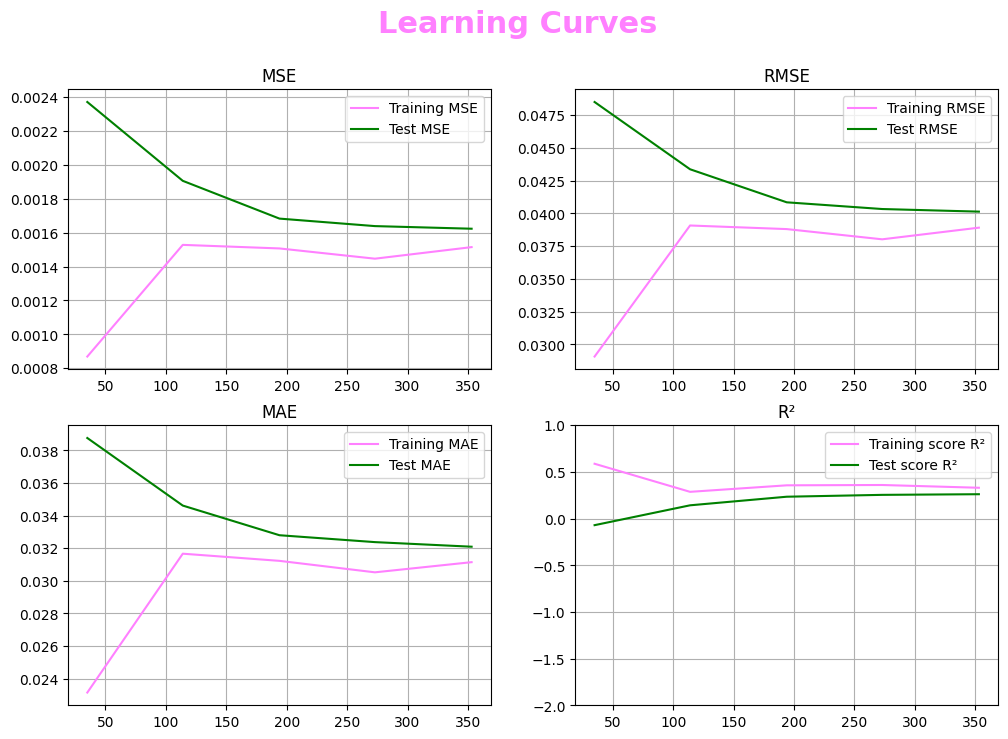

In [35]:
# lets plot the learning curve for the metrics MSE, RMSE, MAE and R2"
learing_curve_on_error_metrics(LinearRegression(), X, y, 5, RANDOM_SEED)

**CONCLUSION ON THE BASELINE**:<br>
As already seen, the model trained is not affected by overfitting. Looking at the error metrics all of them are near to zero which is pretty good, but I can't understand why R2 is not good at all.

## TRAING THE MODEL WITH FEATURE SELECTION
First we will try to train the model removing the feature that where highly correlated, this beacuse this variables bring to the model the same information causing the training of the model to be more difficult and longer without apporting improvement, this because one variable can explain the other strongly correlated and there is no more information that the model can learn. After the removal of the most correlated variables we will train the model and evaluate its performance.<br>
<br>

Secondly we will try to apply the process of feature selection with the SelectBestK that will give us the best variables most related to the target to train the model. With this feature extracted we will train the model and evaluate its performance.

In [37]:
def prepare_train_evaluate(model, data_train, data_test, ground_truth_train, ground_trouth_test):
  """
  This function train a model received as input on the partion train set and get the prediction
  on train set and test set in order to be able to evaluate the model with the prediction collected
  calling at the functionm  show_performance() which will print the results of metrics used.

  Parameter:
  - model( sklearn ML model): model to train.
  - data_train(Dataframe or np.array): train set feature.
  - data_test(Dataframe or np.array): test set feature.
  - ground_truth_train(Dataseries or np.array): train target.
  - ground_truth_test(Dataseries or np.array): test target.
  """

  # train the model and get prediction on train set and test set
  model.fit(data_train, ground_truth_train)
  train_prediction = model.predict(data_train)
  test_prediction = model.predict(data_test)

  # show performance on both partition
  show_performance(ground_truth_train, train_prediction, ON_TRAIN_SET)
  print("\n")
  show_performance(ground_trouth_test, test_prediction, ON_TEST_SET)

In [38]:
# based on the correlation matrix we remove the variable strongly correlated
X_rmv_corr = X.drop(['HDL', 'LDL', 'CF-HDL'], axis=1)
X_rmv_corr

,age,sex,bmi,bp,cholesterol,Trig
0,0.038076,1,0.061696,0.021872,-0.044223,-0.002592
1,-0.001882,0,-0.051474,-0.026328,-0.008449,-0.039493
2,0.085299,1,0.044451,-0.005670,-0.045599,-0.002592
3,-0.089063,0,-0.011595,-0.036656,0.012191,0.034309
4,0.005383,0,-0.036385,0.021872,0.003935,-0.002592
...,...,...,...,...,...,...
437,0.041708,1,0.019662,0.059744,-0.005697,-0.002592
438,-0.005515,1,-0.015906,-0.067642,0.049341,0.034309
439,0.041708,1,-0.015906,0.017293,-0.037344,-0.011080
440,-0.045472,0,0.039062,0.001215,0.016318,0.026560


In [39]:
# prepare the data as train and teste set
X_train_rmv_corr, X_test_rmv_corr, y_train_rmv_corr, y_test_rmv_corr = train_test_split(X_rmv_corr, y, test_size=0.15, random_state=RANDOM_SEED)

In [40]:
# train the model and show the result on both patition
lr_rmv_corr = LinearRegression()
prepare_train_evaluate(lr_rmv_corr, X_train_rmv_corr, X_test_rmv_corr, y_train_rmv_corr, y_test_rmv_corr)

MODEL EVALUATION RESULTS ON TRAINING SET:
MAE = 0.031319897306062536
MSE = 0.0015503243074706488
RMSE = 0.03937415786363753
R2 = 0.28800049376793624


MODEL EVALUATION RESULTS ON TEST SET:
MAE = 0.033280805011306355
MSE = 0.0017033634258617088
RMSE = 0.041271823631403894
R2 = 0.3768617942327349


In [41]:
# use the cross validation to train the model and show the mean of the result for each metrric used
kf_score_for_lr_rmv_corr = performace_on_kf(LinearRegression(), X_rmv_corr.values, y.values, fold=5, shuffle_mode=True)
for m, r in kf_score_for_lr_rmv_corr.items():
  print(f"{m}: {r.mean()}")

mae_train: 0.031607862225194024
mae_test: 0.032221757161936364
mse_train: 0.0015608378698379736
mse_test: 0.0016205337488370062
rmse_train: 0.039504924376002976
rmse_test: 0.04022175727401639
r2_train: 0.3096857726587593
r2_test: 0.2764136820355828


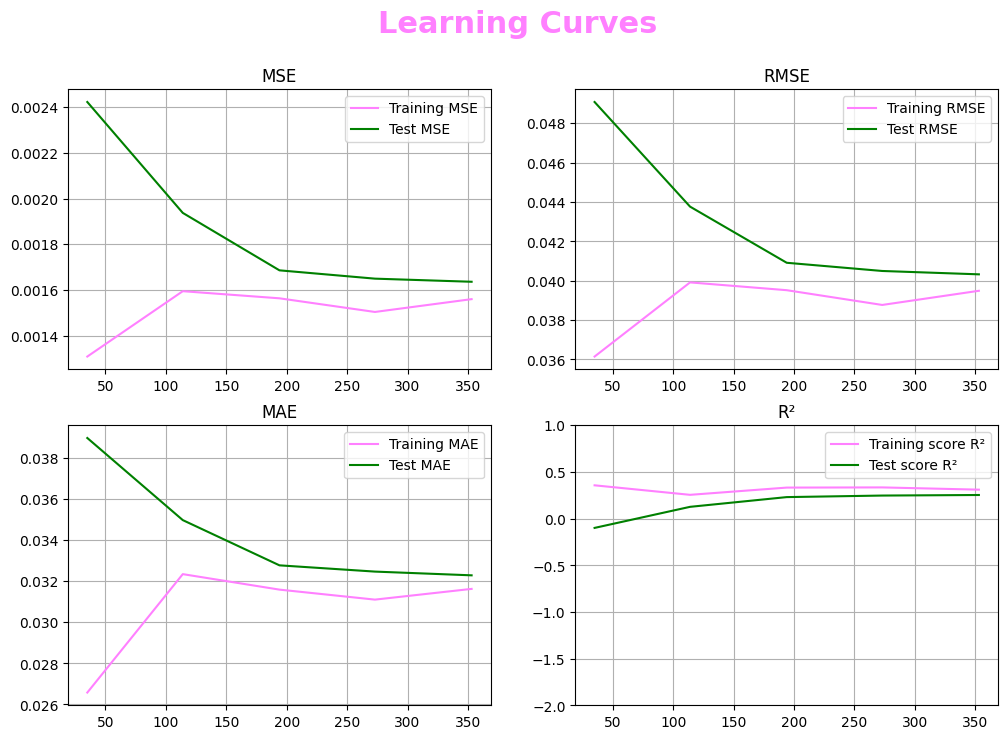

In [43]:
# lets plot the learnign curves on the metrics we are using
learing_curve_on_error_metrics(LinearRegression(), X_rmv_corr, y, 5, RANDOM_SEED)

### FEATURE SELECTION WITH SELECTKBEST

In [44]:
# we started with a k = 5, note that if we decrease k to less than 5 the performance get worse and if we increase k above 5
# the performance will improve.
selector = SelectKBest(f_regression,k = 5)

In [45]:
# apply feature selection
X_fs = selector.fit_transform(X,y)

In [46]:
X_fs

array([[ 0.06169621,  0.02187239, -0.0442235 , -0.00259226,  0.01990749],
       [-0.05147406, -0.02632753, -0.00844872, -0.03949338, -0.06833155],
       [ 0.04445121, -0.00567042, -0.04559945, -0.00259226,  0.00286131],
       ...,
       [-0.01590626,  0.01729339, -0.03734373, -0.01107952, -0.04688253],
       [ 0.03906215,  0.00121528,  0.01631843,  0.02655962,  0.04452873],
       [-0.0730303 , -0.08141314,  0.08374012, -0.03949338, -0.00422151]])

In [47]:
# partitioning of the date in train and test
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y, test_size=0.15, random_state=RANDOM_SEED)

In [48]:
# training the model and show results
lr_fs = LinearRegression()
prepare_train_evaluate(lr_fs, X_train_fs, X_test_fs, y_train_fs, y_test_fs)

MODEL EVALUATION RESULTS ON TRAINING SET:
MAE = 0.03161497846866245
MSE = 0.0015555858711858417
RMSE = 0.03944091620621714
R2 = 0.2855840762808507


MODEL EVALUATION RESULTS ON TEST SET:
MAE = 0.03257906597109183
MSE = 0.0016483633135960809
RMSE = 0.040600040807813
R2 = 0.396982380805071


In [49]:
# using the cross validation to train the model and show the mean of each metric used
kf_score_for_lr_fs = performace_on_kf(LinearRegression(), X_fs, y.values, fold=5, shuffle_mode=True)
for m, r in kf_score_for_lr_rmv_corr.items():
  print(f"{m}: {r.mean()}")

mae_train: 0.031607862225194024
mae_test: 0.032221757161936364
mse_train: 0.0015608378698379736
mse_test: 0.0016205337488370062
rmse_train: 0.039504924376002976
rmse_test: 0.04022175727401639
r2_train: 0.3096857726587593
r2_test: 0.2764136820355828


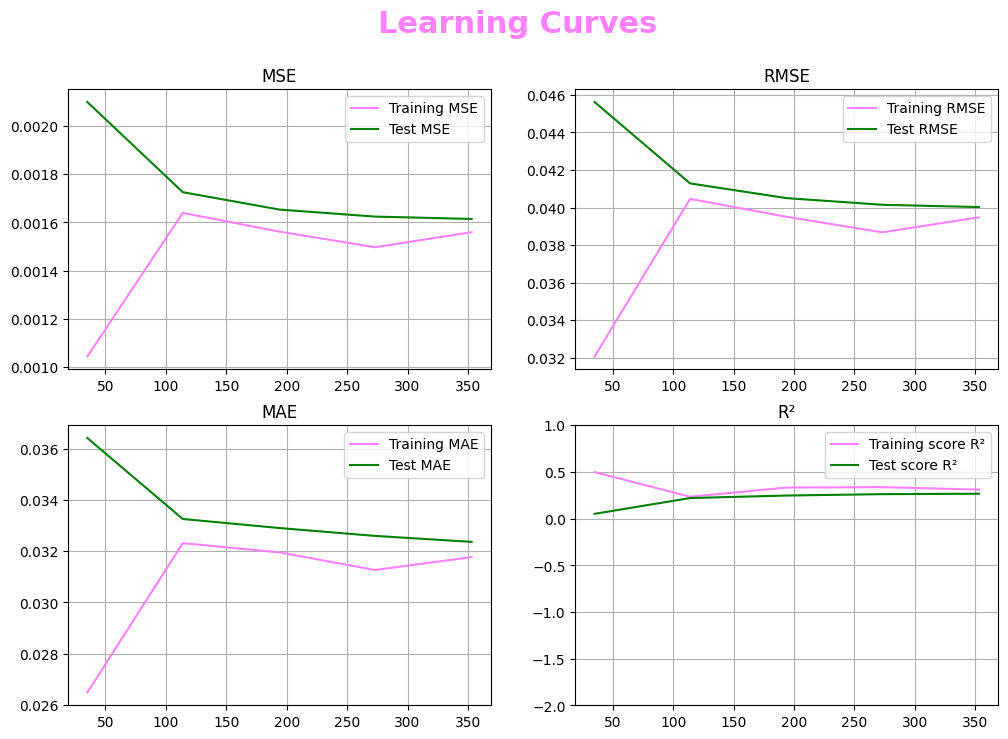

In [50]:
# plot the learning curve on the error metrics
learing_curve_on_error_metrics(LinearRegression(), X_fs, y, 5, RANDOM_SEED)

**CONCLUSION**:<br>
Also the experiment conducted by removing the most correlated variable or using the feture selection do not have change completely the result. The error metrics continue to be low which to my knowledge look good, but R2 is too low even using a cross validation. From the learning curves I do not reckonize overfitting.

### MAKE SOME TRIAL
We will use a Ridge regression or Lasso regretion, just to see if there are any change in the result, but as stated before from previuos learning curve the overfitting is not present in the plot

In [51]:
ridge_fs = Ridge(1.0)
prepare_train_evaluate(ridge_fs, X_train_fs, X_test_fs, y_train_fs, y_test_fs)

MODEL EVALUATION RESULTS ON TRAINING SET:
MAE = 0.03209241576485011
MSE = 0.001626631902256245
RMSE = 0.04033152491855776
R2 = 0.2529555876490728


MODEL EVALUATION RESULTS ON TEST SET:
MAE = 0.0341376618212397
MSE = 0.0018124809448606366
RMSE = 0.04257324212296541
R2 = 0.33694353957585255


In [52]:
lasso_fs = Lasso(alpha=1.)
prepare_train_evaluate(lasso_fs , X_train_fs, X_test_fs, y_train_fs, y_test_fs)

MODEL EVALUATION RESULTS ON TRAINING SET:
MAE = 0.03614361993283601
MSE = 0.0021774232901860297
RMSE = 0.04666286843075584
R2 = 0.0


MODEL EVALUATION RESULTS ON TEST SET:
MAE = 0.04202857816252028
MSE = 0.002739156182383128
RMSE = 0.05233694853908783
R2 = -0.002060301924734498


**NOTE**:<br>
on this last model lasso_fs the R2 is very bad.